In [1]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow

api_key = "362d2ce77ac1347c707f15a319677c99"

In [8]:
print("How much are you willing to spend in one day per person")
min_amount=input("Min amount")
max_amount=input("Max amount")

How much are you willing to spend in one day per person
Min amount100
Max amount600


In [19]:
area_int=input("Please enter the area of your interests(all,dining,shopping,museums,sports,spas):")
    
if area_int== "all":
    int_type=input("Please enter place type (hotel,amusement_park,bar,cafe,casino,museum,night_club,restaurant,shopping_mall,spa,stadium,zoo): ")
elif area_int== "dining":
    int_type=input("Please enter place type (bar,cafe,casino,night_club,restaurant): ")
elif area_int== "shopping":
    int_type=input("Please enter place type (shopping_mall): ")
elif area_int== "museums":
    int_type=input("Please enter place type (museums,zoo): ")
elif area_int=="sports":
    int_type=input("Please enter place type (amusement_park,stadium): ")
elif area_int=="spas":
    int_type=input("Please enter place type (spas): ")  
    
#     put error handling for if user enter invalid data 

Please enter the area of your interests(all,dining,shopping,museums,sports,spas):all
Please enter place type (hotel,amusement_park,bar,cafe,casino,museum,night_club,restaurant,shopping_mall,spa,stadium,zoo): hotel


In [20]:

## I PULLED IN THE NEW .CSV WITH THE NUMBER OF REVIEWS

city_interest = pd.read_csv("Output/city_interest_rating_summary.csv")
city_interest=city_interest.sort_values(by=['city_sort','Average of Ratings','Total Rating Counts'], ascending=False)
city_interest.head()

,Total Rating Counts,Average of Ratings,Max Number of Reviews,Average Number of Reviews,city_sort,interest_sort
1285,20,4.62,1105.0,488.00,"Wichita, KS",restaurant
1289,3,4.57,4064.0,1430.67,"Wichita, KS",zoo
1280,20,4.56,710.0,292.65,"Wichita, KS",cafe
1287,20,4.46,172.0,61.20,"Wichita, KS",spa
1279,20,4.39,1056.0,394.75,"Wichita, KS",bar


In [39]:

## I ADDED THE NUMBER OF REVIEWS AND ADJUSTED THE COLUMN NUMBERS IN THE FOR LOOP

city=[]
rating=[]
count=[]
review = []
for index,row in city_interest.iterrows():
        if(int_type==row[5]):
                city.append(row[4])
                rating.append(row[1])
                count.append(row[0])
                review.append(row[3])

In [40]:

## I ADDED THE NUMBER OF REVIEWS TO DATAFRAME

final_interest_df=pd.DataFrame({"CityState": city,"Rating": rating,"Count" : count,"Avg Number of Reviews" : review})
final_interest_df.head()

,CityState,Rating,Count,Avg Number of Reviews
0,"Wichita, KS",4.31,20,497.95
1,"West Palm Beach, FL",4.04,20,599.40
2,"Washington, DC",4.44,20,1387.75
3,"Virginia Beach, VA",3.98,20,718.70
4,"Vancouver, WA",4.22,20,447.15


In [41]:
city_temp_cost = pd.read_csv("CSV_Data_Files/CityTravelCost.csv")
interest_cost_merge=pd.merge(final_interest_df,city_temp_cost,on='CityState',how='inner')
interest_cost_merge.head()

,CityState,Rating,Count,Avg Number of Reviews,City,State,Average Daily Cost per person,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"West Palm Beach, FL",4.04,20,599.40,West Palm Beach,FL,350,NaN,NaN,NaN
1,"Washington, DC",4.44,20,1387.75,Washington,DC,155,NaN,NaN,NaN
2,"Tacoma, WA",3.78,20,827.75,Tacoma,WA,110,NaN,NaN,NaN
3,"Seattle, WA",4.42,20,1753.70,Seattle,WA,154,NaN,NaN,NaN
4,"Santa Rosa, CA",3.74,20,326.15,Santa Rosa,CA,250,NaN,NaN,NaN


In [42]:

## I ADDED THE NUMBER OF REVIEWS AND ADJUSTED THE COLUMN NUMBERS IN THE FOR LOOP

# city_temp_cost = pd.read_csv("CSV_Data_Files/CityTravelCost.csv")
cityState=[]
amount=[]
count=[]
rating=[]
review = []
for index, row in interest_cost_merge.iterrows():
    if((int(row[6]) >= int(min_amount)) and (int(row[6]) <= int(max_amount))):
        cityState.append(row[0])
        amount.append(row[6])
        count.append(row[2])
        rating.append(row[1])
        review.append(row[3])


In [43]:

## I ADDED THE NUMBER OF REVIEWS TO THE DATAFRAME

city_travel_df = pd.DataFrame({
    'CityState': cityState,
    'AvgAmt': amount,
    'Cnt': count,
    'Rating':rating,
    'Review':review
    },index=cityState)

if(len(city_travel_df) < 1):
    print("Please Broaden your search Criterea")
city_travel_df=city_travel_df.nlargest(5, ['Rating','Cnt'],keep='first')

In [44]:
city_travel_df.head()

,CityState,AvgAmt,Cnt,Rating,Review
"Chicago, IL","Chicago, IL",180,20,4.45,2362.60
"Washington, DC","Washington, DC",155,20,4.44,1387.75
"Seattle, WA","Seattle, WA",154,20,4.42,1753.70
"Las Vegas, NV","Las Vegas, NV",250,20,4.40,19948.25
"Santa Barbara, CA","Santa Barbara, CA",130,20,4.39,378.10


In [45]:
settings = {"units": "metric", "appid": api_key}

In [46]:
# Get data for each city in cities.csv
weather_data = []
summary = ["name", "main.temp"]
weather_df = pd.DataFrame()
for index,row in city_travel_df.iterrows():
    try:
        cityName=row[0].split(',')
        weather_data=ow.get_current(cityName[0], **settings)
        data = weather_data(*summary)
        weather_df=weather_df.append({'State/Cities': data[0], 'Current Temp': data[1]}, ignore_index=True)
    except:
        print("record not found " + row[0] )

In [47]:
weather_df

,Current Temp,State/Cities
0,27.96,Chicago
1,24.91,Washington DC.
2,14.26,Seattle
3,37.44,Las Vegas
4,24.60,Santa Barbara


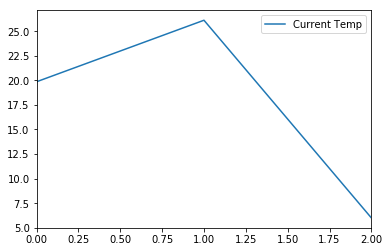

In [90]:
lines = weather_df.plot.line()

In [52]:
#NAME VARIABLES FOR PLOTTING FROM 
weather = weather_df["Current Temp"]

interest_rating = city_travel_df["Rating"]
city_cost = city_travel_df["AvgAmt"]
rating_count = city_travel_df["Cnt"]
avg_reviews = city_travel_df["Review"]

#THIS VARIABLE IS FOR LABELING THE POINTS
cities = city_travel_df["CityState"]

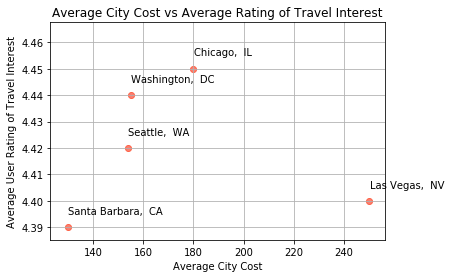

In [59]:
#SCATTER PLOT 1 - COST vs RATING

#Add Labels
for i,type in enumerate(cities):
    x = city_cost[i]
    y = interest_rating[i]
    plt.scatter(x, y, marker="o", facecolors="salmon", edgecolors="tomato")
    plt.text(x+0.1, y+0.005, type, fontsize=10)


#Title & Grid
plt.title("Average City Cost vs Average Rating of Travel Interest")
plt.xlabel("Average City Cost")
plt.ylabel("Average User Rating of Travel Interest")
plt.grid(True)
plt.show()

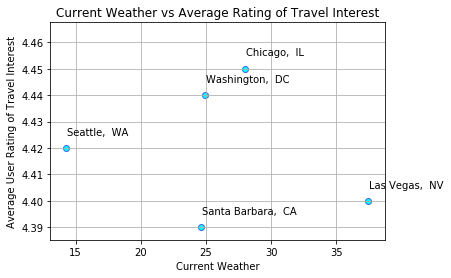

In [60]:
#SCATTER PLOT 2 - WEATHER vs RATING

#Add Labels throguh Loop
for i,type in enumerate(cities):
    x = weather[i]
    y = interest_rating[i]
    plt.scatter(x, y, marker="o", facecolors="aqua", edgecolors="royalblue")
    plt.text(x+0.1, y+0.005, type, fontsize=10)


#Title & Grid
plt.title("Current Weather vs Average Rating of Travel Interest")
plt.xlabel("Current Weather")
plt.ylabel("Average User Rating of Travel Interest")
plt.grid(True)
plt.show()

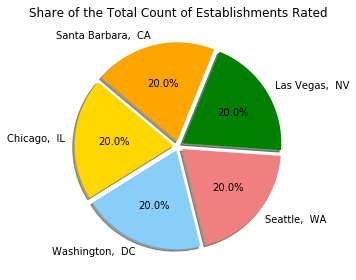

In [58]:
#PIE CHART - COUNT OF USER RATINGS

colors = ["gold","lightskyblue", "lightcoral", "green", "orange"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(rating_count, colors=colors, explode=explode, labels=cities, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Share of the Total Count of Establishments Rated")

plt.tight_layout()

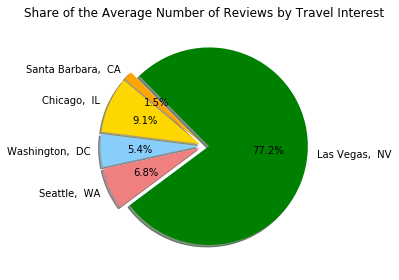

In [61]:
#PIE CHART - Average of the Number of Reviews

colors = ["gold","lightskyblue", "lightcoral", "green", "orange"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(avg_reviews, colors=colors, explode=explode, labels=cities, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Share of the Average Number of Reviews for Travel Interest")

plt.tight_layout()